# L4: Word embeddings

In this lab you will explore word embeddings. A **word embedding** is a mapping of words to points in a vector space such that nearby words (points) are similar in terms of their distributional properties. You will use word embedding to find similar words, and evaluate their usefulness in an inference task.

You will use the word vectors that come with [spaCy](http://spacy.io). Note that you will need the &lsquo;large&rsquo; English language model; the &lsquo;small&rsquo; model that you used in previous labs does not include proper word vectors.

In [1]:
import spacy
print(spacy.__version__)

nlp = spacy.load("en_core_web_lg")

2.2.2


In [2]:
# just to remove some anoyning warnings
import warnings
warnings.filterwarnings('ignore')

Every word in the model&rsquo;s vocabulary comes with a 300-dimensional vector, represented as a NumPy array. The following code cell shows how to access the vector for the word *cheese*:

In [3]:
nlp.vocab["cheese"].vector

array([-5.5252e-01,  1.8894e-01,  6.8737e-01, -1.9789e-01,  7.0575e-02,
        1.0075e+00,  5.1789e-02, -1.5603e-01,  3.1941e-01,  1.1702e+00,
       -4.7248e-01,  4.2867e-01, -4.2025e-01,  2.4803e-01,  6.8194e-01,
       -6.7488e-01,  9.2401e-02,  1.3089e+00, -3.6278e-02,  2.0098e-01,
        7.6005e-01, -6.6718e-02, -7.7794e-02,  2.3844e-01, -2.4351e-01,
       -5.4164e-01, -3.3540e-01,  2.9805e-01,  3.5269e-01, -8.0594e-01,
       -4.3611e-01,  6.1535e-01,  3.4212e-01, -3.3603e-01,  3.3282e-01,
        3.8065e-01,  5.7427e-02,  9.9918e-02,  1.2525e-01,  1.1039e+00,
        3.6678e-02,  3.0490e-01, -1.4942e-01,  3.2912e-01,  2.3300e-01,
        4.3395e-01,  1.5666e-01,  2.2778e-01, -2.5830e-02,  2.4334e-01,
       -5.8136e-02, -1.3486e-01,  2.4521e-01, -3.3459e-01,  4.2839e-01,
       -4.8181e-01,  1.3403e-01,  2.6049e-01,  8.9933e-02, -9.3770e-02,
        3.7672e-01, -2.9558e-02,  4.3841e-01,  6.1212e-01, -2.5720e-01,
       -7.8506e-01,  2.3880e-01,  1.3399e-01, -7.9315e-02,  7.05

## Problem 1: Finding similar words

Your first task is to use the word embeddings to find similar words. More specifically, we ask you to write a function `most_similar` that takes a vector $x$ and returns a list with the 10 most similar entries in spaCy&rsquo;s vocabulary, with similarity being defined by cosine.

**Tip:** spaCy already has a [`most_similar`](https://spacy.io/api/vectors#most_similar) method that you can wrap.

In [4]:
# # TODO: Enter your implementation of `most_similar` here
# # custom implementation-->slightly different results
# import numpy as np
# from numpy import dot
# from numpy.linalg import norm

# # cosine similarity
# def cosine(v1, v2):
#     if norm(v1) > 0 and norm(v2) > 0:
#         return dot(v1, v2) / (norm(v1) * norm(v2))
#     else:
#         return 0.0

# def most_similar(vect):
#     computed_similarities = {}
    
#     for word in nlp.vocab:
#         if not word.has_vector:
#             continue
#         similarity = cosine(vect,word.vector)
#         computed_similarities[word] = similarity
        
#     sorted_similarities = sorted(computed_similarities.items(), key=lambda x:x[1], reverse=True)
#     final_words = [word[0] for word in sorted_similarities[:10]]
#     return final_words

In [5]:
# most_similar(nlp.vocab["cheese"].vector) # the output is spacy lexeme objects

In [6]:
import numpy as np

def most_similar(vect):
    
    query = np.asarray([vect])
    mst_smlr = nlp.vocab.vectors.most_similar(query,n=10)
    most_similar_words = []
    for key in nlp.vocab.vectors.keys():
        if key in mst_smlr[0].flatten().tolist():
            most_similar_words.append (nlp.vocab[key])
    return most_similar_words


In [7]:
print(" ".join(w.text for w in most_similar(nlp.vocab["cheese"].vector)))

Cheese BACON CHEDDAR Cheddar cheese CHEESE bacon Bacon cheeses cheddar


Test your implementation by running the following code cell, which will print the 10 most similar words for the word *cheese*:

You should get the following output:

Once you have a working implementation of `most_similar`, use it to think about in what sense the returned words really are &lsquo;similar&rsquo; to the cue word. Try to find examples where the cue word and at least one of the words returned by `most_similar` are in the following semantic relations:

1. synonymy (exchangeable meanings)
2. antonymy (opposite meanings)
3. hyperonymy/hyponymy (more specific/less specific meanings)

Document your examples in the code cell below.

In [8]:
# TODO: Insert code here to generate your examples


## Problem 2: Plotting similar words

Your next task is to visualize the word embedding space by a plot. To do so, you will have to reduce the dimensionality of the space from 300 to 2&nbsp;dimensions. One suitable algorithm for this is [T-distributed Stochastic Neighbor Embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (TSNE), which is implemented in scikit-learn&rsquo;s [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) class.

Write a function `plot_most_similar` that takes a list of words (lexemes) and does the following:

1. For each word in the list, find the most similar words (lexemes) in the spaCy vocabulary.
2. Compute the TSNE transformation of the corresponding vectors to 2&nbsp;dimensions.
3. Produce a scatter plot of the transformed vectors, with the vectors as points and the corresponding word forms as labels.

In [9]:
# TODO: Write code here to plot the most similar words
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import math

# def get_labels_vectors(obj):
#     mst_similar = most_similar(obj.vector)
#     labels = [w.text for w in mst_similar]
#     vectors = [x.vector for x in mst_similar]
#     X = np.array(vectors)
#     X_embedded = TSNE(n_components=2).fit_transform(X)
    
#     result_obj = [X_embedded,labels]
    
#     return result_obj

# def plot_mst_sim(X_embedded,labels):
#     fig, ax = plt.subplots(figsize=(10,8))
#     ax.scatter(X_embedded[:,0],X_embedded[:,1],c=np.arange(1,11))
        
#     for i, txt in enumerate(labels):
#         ax.annotate(txt, (X_embedded[:,0][i],X_embedded[:,1][i]),
#                     textcoords="offset points", # how to position the text
#                     xytext=(0,10), # distance from text to points (x,y)
#                     ha='center')

# def plot_most_similar(input_list):
#     input_words = [lexeme.text for lexeme in input_list]
#     n_rows = math.floor((len(input_list)/2)+1)
# #     fig, ax = plt.subplots(nrows=n_rows, ncols=2,figsize=(12,11),constrained_layout=True)
#     plt.figure(figsize=(18,14))
#     for i,item in enumerate(input_list):
#         X_embedded,labels = get_labels_vectors(item)
#         plt.subplot(n_rows,2,i+1)
       
#         plt.scatter(X_embedded[:,0],X_embedded[:,1],c=np.arange(1,11))
        
        
#         for k, txt in enumerate(labels):
#             plt.annotate(txt, (X_embedded[:,0][k],X_embedded[:,1][k]),
#                         textcoords="offset points", # how to position the text
#                         xytext=(0,8), # distance from text to points (x,y)
#                          ha="center", va="bottom")
#                          #horizontalalignment='center', verticalalignment='bottom')
            
#         plt.title('Plot for :' + input_words[i])
#     _ = plt.suptitle("Most similar words Plot", size=20)


In [10]:
# plot_most_similar([nlp.vocab[w] for w in ["cheese", "goat", "sweden", "university", "computer"]])

In [51]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_most_similar(input_list):
    input_words = [lexeme.text for lexeme in input_list]
    colors = ["red", "blue", "orange","black","green"]
    markers = ['^','+','o','x','*']
    plt.figure(figsize=(18,14))
    for i,obj in enumerate(input_list):
        
        X = []
        labels = []
        mst_similar = most_similar(obj.vector)
        for lexeme in mst_similar:
            X.append(lexeme.vector)
            labels.append(lexeme.text)
            
            
        X = np.array(X)
        X_embedded = TSNE(n_components=2).fit_transform(X)
    
        
       
        plt.scatter(X_embedded[:,0],X_embedded[:,1],c=colors[i],s=150,alpha=0.20,marker=markers[i])
        
        
        for k, txt in enumerate(labels):
            plt.annotate(txt, (X_embedded[:,0][k],X_embedded[:,1][k]),
                        textcoords="offset points", # how to position the text
                        xytext=(0,8), # distance from text to points (x,y)
                         ha="center", va="bottom")
                         #horizontalalignment='center', verticalalignment='bottom')

    plt.legend(input_words,title="custer word", fancybox=True)
    plt.grid(True)
    _ = plt.title("Most similar words Plot", size=20)
    plt.show()



Test your code by running the following cell:

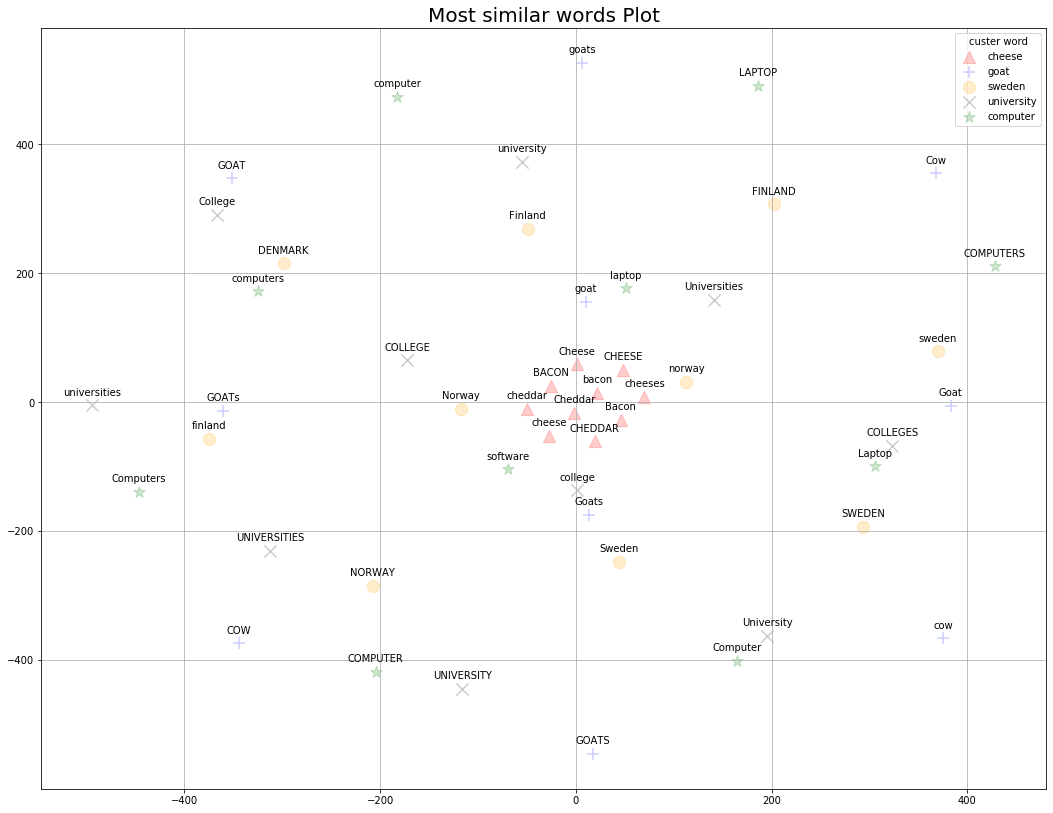

In [52]:
plot_most_similar([nlp.vocab[w] for w in ["cheese", "goat", "sweden", "university", "computer"]])

## Problem 3: Analogies

In a **word analogy task** you are given three words $x$, $y$, $z$ and have to predict a word $w$ that has the same semantic relation to $z$ as $y$ has to $x$. One example is *man*, *woman*, *brother*, the expected answer being *sister* (the semantic relation is *male*/*female*).

[Mikolov et al. (2013)](http://www.aclweb.org/anthology/N13-1090) have shown that word analogy tasks can be solved by adding and substracting word vectors in a word embedding: the vector for *sister* is the closest vector (in terms of cosine distance) to the vector *brother* $-$ *man* $+$ *woman*. Your next task is to write a function `fourth` that takes in three words (say *brother*, *man*, *woman*) and predicts the word that completes the analogy (in this case, *sister*).

In [38]:
# TODO: Enter code here to solve the analogy problem
import numpy as np
from numpy import dot
from numpy.linalg import norm

# cosine similarity
def cosine(v1, v2):
    if norm(v1) > 0 and norm(v2) > 0:
        return dot(v1, v2) / (norm(v1) * norm(v2))
    else:
        return 0.0


def analogy(word1,word2,word3):
    word1_text = word1.vector
    word2_text = word2.vector
    word3_text = word3.vector
    
    sentence = word1_text - word2_text + word3_text
    
#     query = np.asarray([sentence])
#     mst_smlr = nlp.vocab.vectors.most_similar(query,n=1)
#     for key in nlp.vocab.vectors.keys():
#         if key in mst_smlr[0].flatten().tolist():
#             pred_similar_words = nlp.vocab[key]
#     return  pred_similar_word

    computed_similarities = []
    
    for word in nlp.vocab:
        if not word.has_vector:
            continue
        similarity = cosine(sentence, word.vector)
        computed_similarities.append((word, similarity))
 
    computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])
    semantic_relationship = computed_similarities[0][0]
    

    return semantic_relationship
    

Test your code by running the following code. You should get *sister*.

In [39]:
print('The predicted word for brother -man + woman is :\n',analogy(nlp.vocab["brother"], nlp.vocab["man"], nlp.vocab["woman"]).text)

The predicted word for brother -man + woman is :
 sister


You should also be able to get the following:

* *Stockholm* $-$ *Sweden* $+$ *Germany* $=$ *Berlin*
* *Swedish* $-$ *Sweden* $+$ *France* $=$ *French*
* *better* $-$ *good* $+$ *bad* $=$ *worse*
* *walked* $-$ *walk* $+$ *take* $=$ *took*

Experiment with other examples to see whether you get the expected output. Provide three examples of analogies for which the model produces the &lsquo;correct&rsquo; answer, and three examples on which the model &lsquo;failed&rsquo;. Based on your theoretical understanding of word embeddings, do you have a hypothesis as to why the model succeeds/fails in completing the analogy? Discuss this question in a short text.

*TODO: Insert your examples and your discussion here*

In [40]:
def print_prediction(word1,word2,word3):
    if type(word1) is not str and type(word2) is not str and type(word3) is not str:
        print('inputs must be strings')
        sys.exit(-1)
    else:
        input1,input2,input3 = nlp.vocab[word1],nlp.vocab[word2],nlp.vocab[word3]
        pred_word = analogy(input1,input2,input3).text
        print('The predicted word for vector {0} - {1} + {2} is : \n {3}'.format(word1,word2,word3,pred_word))
        

In [41]:
print_prediction('Stockholm','Sweden' ,'Germany')

The predicted word for vector Stockholm - Sweden + Germany is : 
 BERLIN


In [42]:
print_prediction('Swedish','Sweden' ,'France')

The predicted word for vector Swedish - Sweden + France is : 
 french


In [43]:
print_prediction('better','good' ,'bad')

The predicted word for vector better - good + bad is : 
 worse


In [44]:
print_prediction('walked','walk' ,'take')

The predicted word for vector walked - walk + take is : 
 TOOK


In [45]:
print_prediction('Phillip','cool' ,'jackass')

The predicted word for vector Phillip - cool + jackass is : 
 PHILLIP


## Natural language inference dataset

In the second part of this lab, you will be evaluating the usefulness of word embeddings in the context of a natural language inference task. The data for this part is the [SNLI corpus](https://nlp.stanford.edu/projects/snli/), a collection of 570k human-written English image caption pairs manually labeled with the labels *Entailment*, *Contradiction*, and *Neutral*. Consider the following sentence pair as an example:

* Sentence 1: A soccer game with multiple males playing.
* Sentence 2: Some men are playing a sport.

This pair is labeled with *Entailment*, because sentence&nbsp;2 is logically entailed (implied) by sentence&nbsp;1 – if sentence&nbsp;1 is true, then sentence&nbsp;2 is true, too. The following sentence pair, on the other hand, is labeled with *Contradiction*, because both sentences cannot be true at the same time.

* Sentence 1: A black race car starts up in front of a crowd of people.
* Sentence 2: A man is driving down a lonely road.

For detailed information about the corpus, refer to [Bowman et al. (2015)](https://www.aclweb.org/anthology/D15-1075/). For this lab, we load the training portion and the development portion of the dataset.

**Note:** Because the SNLI corpus is rather big, we initially only load a small portion (25,000 samples) of the training data. Once you have working code for Problems&nbsp;4–6, you should set the flag `final` to `True` and re-run all cells with the full dataset.

In [46]:
import bz2
import pandas as pd

final_evaluation = False    # TODO: Set to True for the final evaluation!

with bz2.open("train.jsonl.bz2", 'rt') as source:
    if final_evaluation:
        df_train = pd.read_json(source, lines=True)
    else:
        df_train = pd.read_json(source, lines=True)[:25000]
    print("Number of sentence pairs in the training data:", len(df_train))

with bz2.open("dev.jsonl.bz2", 'rt') as source:
    df_dev = pd.read_json(source, lines=True)
    print("Number of sentence pairs in the development data:", len(df_dev))

Number of sentence pairs in the training data: 25000
Number of sentence pairs in the development data: 9842


When you inspect the data frames, you will see that we have preprocessed the sentences and separated tokens by spaces. In the columns `tagged1` and `tagged2`, we have added the part-of-speech tags for every token (as predicted by spaCy), also separated by spaces.

In [47]:
df_train.head()

,gold_label,sentence1,tags1,sentence2,tags2
0,neutral,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,A person is training his horse for a competiti...,DET NOUN AUX VERB PRON NOUN ADP DET NOUN PUNCT
1,contradiction,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,"A person is at a diner , ordering an omelette .",DET NOUN AUX ADP DET NOUN PUNCT VERB DET NOUN ...
2,entailment,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,"A person is outdoors , on a horse .",DET NOUN AUX ADV PUNCT ADP DET NOUN PUNCT
3,neutral,Children smiling and waving at camera,NOUN VERB CCONJ VERB ADP NOUN,They are smiling at their parents,PRON AUX VERB ADP PRON NOUN
4,entailment,Children smiling and waving at camera,NOUN VERB CCONJ VERB ADP NOUN,There are children present,PRON AUX NOUN ADJ


In [48]:
df_train.shape

(25000, 5)

In [49]:
df_dev.head()

,gold_label,sentence1,tags1,sentence2,tags2
0,neutral,Two women are embracing while holding to go pa...,NUM NOUN AUX VERB SCONJ VERB PART VERB NOUN PUNCT,The sisters are hugging goodbye while holding ...,DET NOUN AUX VERB NOUN SCONJ VERB PART VERB NO...
1,entailment,Two women are embracing while holding to go pa...,NUM NOUN AUX VERB SCONJ VERB PART VERB NOUN PUNCT,Two woman are holding packages .,NUM NOUN AUX VERB NOUN PUNCT
2,contradiction,Two women are embracing while holding to go pa...,NUM NOUN AUX VERB SCONJ VERB PART VERB NOUN PUNCT,The men are fighting outside a deli .,DET NOUN AUX VERB ADP DET NOUN PUNCT
3,entailment,"Two young children in blue jerseys , one with ...",NUM ADJ NOUN ADP ADJ NOUN PUNCT NUM ADP DET NO...,Two kids in numbered jerseys wash their hands .,NUM NOUN ADP ADJ NOUN VERB PRON NOUN PUNCT
4,neutral,"Two young children in blue jerseys , one with ...",NUM ADJ NOUN ADP ADJ NOUN PUNCT NUM ADP DET NO...,Two kids at a ballgame wash their hands .,NUM NOUN ADP DET NOUN VERB PRON NOUN PUNCT


In [50]:
df_dev.shape

(9842, 5)

## Problem 4: Two simple baselines

Your first task is to establish two simple baselines for the natural language inference task.

### Random baseline

One drawback with the Most Frequent Class (MFC) baseline is that it does not yield well-defined precision and recall values for all classes. Here we therefore ask you to implement a classifier that generates *random* predictions, where the probability of a class is determined by its relative frequency in the training data. This functionality is provided by scikit-learn&rsquo;s [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Write code to evaluate the performance of this classifier on the development data.

In [51]:
# TODO: Enter code here to implement the random baseline. Print the classification report.
X_train,X_test = df_train.loc[:, df_train.columns != 'gold_label'] , df_dev.loc[:, df_dev.columns != 'gold_label']
y_train,y_test = df_train.loc[:,df_train.columns == 'gold_label'] , df_dev.loc[:,df_dev.columns == 'gold_label']

print('shape of X_train : {0} , shape of X_test :{1}'.format(X_train.shape,X_test.shape))
print('\nshape of y_train : {0} , shape of y_test :{1}'.format(y_train.shape,y_test.shape))

shape of X_train : (25000, 4) , shape of X_test :(9842, 4)

shape of y_train : (25000, 1) , shape of y_test :(9842, 1)


In [52]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dummy = DummyClassifier(strategy='uniform', random_state=13)
dummy.fit(X_train, y_train)

print('Evaluation score on test data is : {0:.2f}'.format(dummy.score(X_test, y_test)))


Evaluation score on test data is : 0.34


In [53]:
print(classification_report(df_dev["gold_label"], dummy.predict(X_test)))

               precision    recall  f1-score   support

contradiction       0.33      0.34      0.33      3278
   entailment       0.34      0.33      0.34      3329
      neutral       0.33      0.34      0.34      3235

     accuracy                           0.34      9842
    macro avg       0.34      0.34      0.34      9842
 weighted avg       0.34      0.34      0.34      9842



### One-sided baseline

A second obvious baseline for the inference task is to predict the class label of a sentence pair based on the text of only one of the two sentences, just as in a standard document classification task. Put together a simple [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) + [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) pipeline that implements this idea, train it, and evaluate it on the development data. Is it better to base predictions on sentence&nbsp;1 or sentence&nbsp;2?

In [54]:
# TODO: Enter code here to implement the one-sentence baselines. Print the classification reports.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X_train_sentence1 ,X_test_sentence1 = df_train['sentence1'] , df_dev['sentence1']

logistic_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression())
])

logistic_clf.fit(X_train_sentence1,y_train)

print('Evaluation score on test data using sentence 1 is : {0:.2f}'.format(logistic_clf.score(X_test_sentence1, y_test)))

Evaluation score on test data using sentence 1 is : 0.33


In [55]:
X_train_sentence2 ,X_test_sentence2 = df_train['sentence2'] , df_dev['sentence2']

logistic_clf2 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression())
])

logistic_clf2.fit(X_train_sentence2,y_train)

print('Evaluation score on test data using sentence 2 is : {0:.2f}'.format(logistic_clf2.score(X_test_sentence2, y_test)))

Evaluation score on test data using sentence 2 is : 0.60


## Problem 5: A classifier based on manually engineered features

[Bowman et al., 2015](https://www.aclweb.org/anthology/D15-1075/) evaluate a classifier that uses (among others) **cross-unigram features**. This term is used to refer to pairs of unigrams $(w_1, w_2)$ such that $w_1$ occurs in sentence&nbsp;1, $w_2$ occurs in sentence&nbsp;2, and both have been assigned the same part-of-speech tag.

Your next task is to implement the cross-unigram classifier. To this end, the next cell contains skeleton code for a transformer that you can use as the first component in a classification pipeline. This transformer converts each row of the SNLI data frame into a space-separated string consisting of

* the standard unigrams (of sentence&nbsp;1 or sentence&nbsp;2 – this depends on your results in Problem&nbsp;4)
* the cross-unigrams, as defined above.

The space-separated string forms a new &lsquo;document&rsquo; that can be passed to a vectorizer in exactly the same way as a standard sentence in Problem&nbsp;4.

In [56]:
from sklearn.base import BaseEstimator, TransformerMixin

class CrossUnigramsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Vectorize a sentence-tag-sentence-tag quadruple.
    def _transform(self, sentence1, tags1, sentence2, tags2):
        # TODO: Replace the following line with your own code
        string = ''
        
        sentence1 = sentence1.split()
        sentence2 = sentence2.split()
        tags1 = tags1.split()
        tags2 = tags2.split()
        
        for w1,w2,t1,t2 in zip(sentence1,sentence2,tags1,tags2):
            if t1==t2 :
                string = string +" "+w1+" "+w2
                    
        return string

    def transform(self, X):
        return [self._transform(s1, t1, s2, t2) for s1, t1, s2, t2 in X]

Once you have an implementation of the transformer, extend the pipeline that you built for Problem&nbsp;4, train it, and evaluate it on the development data.

In [60]:
# TODO: Enter code here to implement the cross-unigrams classifier. Print the classification report.

# TODO: Enter code here to implement the one-sentence baselines. Print the classification reports.
import time

cross_clf = Pipeline([
    ('transf', CrossUnigramsTransformer()),
    ('vect',CountVectorizer()),
    ('clf', LogisticRegression())
])

start_time= time.time()
cross_clf.fit(np.asarray(X_train).reshape(-1,4),np.asarray(y_train).reshape(-1,))

end_time = time.time()-start_time
measured_time = time.strftime("%H:%M:%S", time.gmtime(end_time))

print('\nTime to execute fit :' ,measured_time)

print('\nEvaluation score on test data is : {0:.2f}'.format(
    cross_clf.score(np.asarray(X_test).reshape(-1,4),np.asarray(y_test).reshape(-1,))))


Time to execute fit : 00:00:00

Evaluation score on test data is : 0.41


## Problem 6: A classifier based on word embeddings

Your last task in this lab is to build a classifier for the natural language inference task that uses word embeddings. More specifically, we ask you to implement a vectorizer that represents each sentence as the sum of its word vectors – a representation known as the **continuous bag-of-words**. Thus, given that spaCy&rsquo;s word vectors have 300 dimensions, each sentence will be transformed into a 300-dimensional vector. To represent a sentence pair, the vectorizer should concatenate the vectors for the individual sentences; this yields a 600-dimensional vector. This vector can then be passed to a classifier.

The next code cell contains skeleton code for the vectorizer. You will have to implement two methods: one that maps a single sentence to a vector (of length 300), and one that maps a sentence pair to a vector (of length 600).

In [61]:
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin

class PairedSentenceVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Vectorize a single sentence.
    def _transform1(self, sentence):
        # TODO: Replace the following line with your own code
        sentence_tokens = nlp(sentence)
        sum_sentence_vectors = np.sum([word.vector for word in sentence_tokens if word.has_vector],axis=0)
        return sum_sentence_vectors

    # Vectorize a pair of sentences.
    def _transform2(self, sentence1, sentence2):
        # TODO: Replace the following line with your own code
        #sentence1_tokens = nlp(sentence1)
        #sentence1_vectors = np.sum([word.vector for word in sentence1_tokens if word.has_vector],axis=0)
        sentence1_vectors = self._transform1(sentence1)
        
        #sentence2_tokens = nlp(sentence2)
        #sentence2_vectors = np.sum([word.vector for word in sentence2_tokens if word.has_vector],axis=0)
        sentence2_vectors = self._transform1(sentence2)
        
        sum_sentences_vector = np.concatenate((sentence1_vectors,sentence2_vectors),axis=0)
        return sum_sentences_vector

    def transform(self, X):
        return np.concatenate(
            [self._transform2(s1, s2).reshape(1, -1) for s1, s2 in X]
        )

In [62]:
# animals = "dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated"
# animal_tokens = nlp(animals)
# animal_vectors = np.sum([word.vector for word in animal_tokens if word.has_vector],axis=0)

# objects = "knife desk laptop pen mousepad calculator"
# objects_tokens = nlp(objects)
# objects_vectors = np.sum([word.vector for word in objects_tokens if word.has_vector],axis=0)

# np.concatenate((objects_vectors,animal_vectors),axis=0).shape

(600,)

Once you have a working implementation, build a pipeline consisting of the new vectorizer and a [multi-layer perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). This more powerful (compared to logistic regression) classifier is called for here because we do not specify features by hand (as we did in Problem&nbsp;5), but want to let the model learn a good representation of the data by itself. Use 3&nbsp;hidden layers, each with size 300. It suffices to train the classifier for 8&nbsp;iterations (epochs).

In [63]:
# TODO: Enter code here to implement the word embeddings classifier. Print the classification report.

from sklearn.neural_network import MLPClassifier

X_train_sentences ,X_test_sentences = df_train[['sentence1','sentence2']] , df_dev[['sentence1','sentence2']]

start_time= time.time()
nn_clf = Pipeline([
    ('vect', PairedSentenceVectorizer()),
    ('clf',  MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=8))
])

nn_clf.fit(np.asarray(X_train_sentences).reshape(-1,2),np.asarray(y_train).reshape(-1,))

end_time = time.time()-start_time
measured_time = time.strftime("%H:%M:%S", time.gmtime(end_time))

print('\nTime to execute fit :' ,measured_time)
print('\nEvaluation score on test data is : {0:.2f}'.format(
    nn_clf.score(np.asarray(X_test_sentences).reshape(-1,2),np.asarray(y_test).reshape(-1,))))



Time to execute fit : 00:05:50

Evaluation score on test data is : 0.64


## Final evaluation

Once you have working code for all problems, re-run the code for Problems&nbsp;4–6 with the full training data. What are your results? How do they differ from the results that you obtained for the smaller training data? How do you interpret this? Summarize your findings in a short text.

*TODO: Insert your discussion of the experimental results here*

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>